# Project 2 EDA and Data Cleaning Notebook

This notebook will go through importing the data, cleaning the data, exploring different aspects of this data.  Any conclusions and observations will be documented along the way and summarized at the end of the notebook.  The cleaned data will be exported as CSV files so they can be used for different modeling approaches to encompass all the deliverables of this project.

Along the way, I will be looking for relationships with sale price for the price prediction model, but also data and insights specific to the remodeling marketing campagin that the Associated General Contractors of Iowa has asked for decision support on.  

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read data file(s)

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

Check heads, shape, columns

In [3]:
train.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [4]:
test.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [5]:
train.shape, test.shape

((2051, 81), (878, 80))

In [6]:
set(train.columns)-set(test.columns)

{'SalePrice'}

Looks like the target is missing from the test data, which is expected.

## Data Cleaning

In [7]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

Treat column names

In [8]:
train.columns = [col.replace(' ', '_').lower() for col in train.columns]
test.columns = [col.replace(' ', '_').lower() for col in test.columns]

There is one name with a `/` .  After reading about this feature, it's not of interest for this analysis so dropping from the data.

In [9]:
train.drop('year_remod/add', axis=1, inplace=True)
test.drop('year_remod/add', axis=1, inplace=True)

Also dropping pid and ms_subclass.  Reviewing the data dictionary, I don't beleive these will be useful for the analysis.

In [10]:
train.drop(['pid', 'ms_subclass'], axis=1, inplace=True)
test.drop(['pid', 'ms_subclass'], axis=1, inplace=True)

Check datatypes

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   ms_zoning        2051 non-null   object 
 2   lot_frontage     1721 non-null   float64
 3   lot_area         2051 non-null   int64  
 4   street           2051 non-null   object 
 5   alley            140 non-null    object 
 6   lot_shape        2051 non-null   object 
 7   land_contour     2051 non-null   object 
 8   utilities        2051 non-null   object 
 9   lot_config       2051 non-null   object 
 10  land_slope       2051 non-null   object 
 11  neighborhood     2051 non-null   object 
 12  condition_1      2051 non-null   object 
 13  condition_2      2051 non-null   object 
 14  bldg_type        2051 non-null   object 
 15  house_style      2051 non-null   object 
 16  overall_qual     2051 non-null   int64  
 17  overall_cond  

Took a first pass through data types and they look reasonable, meaning numeric types for numeric features.  Object for nominal and ordinal.

Look for the outliers from the special note provided with the data description and dispense of them based on their recommendation.

Upon further inspection, there is no total square feet, so will focus on `gr_liv_area` which is the above grade square footage.

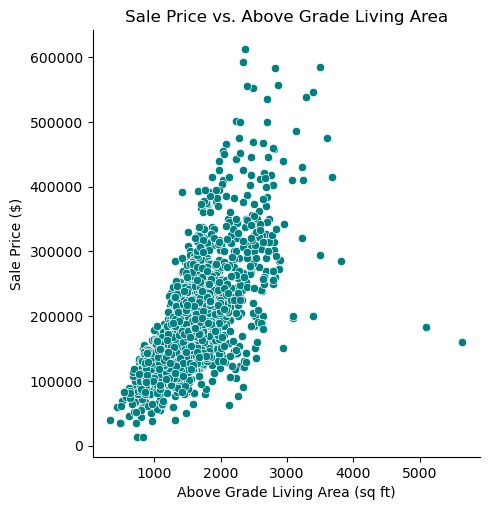

In [12]:
sns.relplot(data=train,
            x='gr_liv_area',
            y='saleprice',
            kind='scatter',
            color='teal').set(title='Sale Price vs. Above Grade Living Area',
                              xlabel='Above Grade Living Area (sq ft)',
                              ylabel='Sale Price ($)');

In [13]:
train[train.gr_liv_area >= 4000]

,id,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


Looks like there might only be 2 outliers over 4000 gr_liv_area. These should be cleaned out of the data.

In [14]:
train.drop(train[train.gr_liv_area >= 4000].index, inplace=True)

Check plot again.

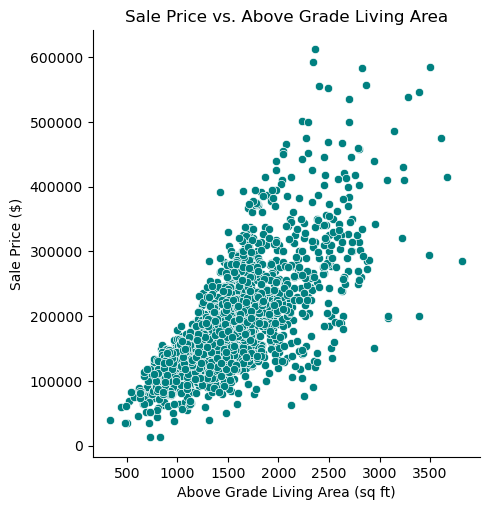

In [15]:
sns.relplot(data=train,
            x='gr_liv_area',
            y='saleprice',
            kind='scatter',
            color='teal').set(title='Sale Price vs. Above Grade Living Area',
                              xlabel='Above Grade Living Area (sq ft)',
                              ylabel='Sale Price ($)');

The > 4000 square feet outliers have been removed.  

Look for and investigate null values.

In [16]:
train.shape

(2049, 78)

In [17]:
# https://stackoverflow.com/questions/69537383/how-to-plot-count-of-null-values-for-each-column-in-pandas-dataframe
# ames.isna().sum()[ames.isna().sum()>0].sort_values(ascending=False)
# devins method df_train.isnull().sum().sort_values(ascending=False).loc[lambda x: x>0]
train.isnull().sum()[train.isnull().sum() > 0
                    ].sort_values(ascending=False)

pool_qc           2041
misc_feature      1985
alley             1909
fence             1649
fireplace_qu      1000
lot_frontage       330
garage_yr_blt      114
garage_cond        114
garage_qual        114
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
garage_cars          1
garage_area          1
bsmtfin_sf_1         1
dtype: int64

Looking at some of the largest offenders:

Pool QC (Ordinal): Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Pool Area (Continuous): Pool area in square feet

Misc Feature (Nominal): Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
Misc Val (Continuous): $Value of miscellaneous feature

It looks like both pool_qc and misc_features are a very small subset of the data, and also have other columns that would only be populated if these were.  Dropping these features.

In [18]:
train.drop(['pool_qc', 
            'pool_area', 
            'misc_feature', 
            'misc_val'
           ], axis=1, inplace=True)

test.drop(['pool_qc', 
            'pool_area', 
            'misc_feature', 
            'misc_val'
           ], axis=1, inplace=True)

Moving on to next largest amounts of nulls:

alley             1909
Alley (Nominal): Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
fence             1649
Fence (Ordinal): Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence


fireplace_qu      1000

Fireplaces (Discrete): Number of fireplaces

FireplaceQu (Ordinal): Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [19]:
train.alley.unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [20]:
train.fence.unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

Both alley and fence have very large amounts of nulls, which indicate "no".  Due to the vast majority of observations having neither of these features, dropping them.

In [21]:
train.drop(['alley', 'fence'], axis=1, inplace=True)
test.drop(['alley', 'fence'], axis=1, inplace=True)

fireplace_qu is there for about half of the observations.  Given so many, I'll keep this around, but treat for now.

In [22]:
train.fireplace_qu.unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

Assuming nan means there is no fireplace, but doing a quick check to see if that assumption might be true.

In [23]:
train[(train.fireplace_qu.isnull()) &
     (train.fireplaces > 0)
     ][['fireplaces', 'fireplace_qu']]

,fireplaces,fireplace_qu


It looks to be the case that all the nans are in observations that have 0 fireplaces listed.  Filling nans with NA for now.

In [24]:
train.fireplace_qu.fillna('no value', inplace=True)
test.fireplace_qu.fillna('no value', inplace=True)

Check overall nulls again.

In [25]:
train.isnull().sum()[train.isnull().sum() > 0
                    ].sort_values(ascending=False)

lot_frontage      330
garage_yr_blt     114
garage_qual       114
garage_finish     114
garage_cond       114
garage_type       113
bsmt_exposure      58
bsmtfin_type_2     56
bsmtfin_type_1     55
bsmt_cond          55
bsmt_qual          55
mas_vnr_type       22
mas_vnr_area       22
bsmt_full_bath      2
bsmt_half_bath      2
bsmtfin_sf_1        1
bsmtfin_sf_2        1
total_bsmt_sf       1
garage_cars         1
garage_area         1
bsmt_unf_sf         1
dtype: int64

From this data it looks like lot_frontage is the next feature to tackle.  Then there is a pattern where garage and basement have related data that might be missing, since those nulls appear to be about the same across multiple features that are related.

Lot Frontage (Continuous): Linear feet of street connected to property

In [26]:
train[train.lot_frontage.isnull()][['lot_area', 'lot_frontage']]

,lot_area,lot_frontage
0,13517,NaN
7,12160,NaN
8,15783,NaN
23,7980,NaN
27,11700,NaN
...,...,...
2016,7791,NaN
2022,16381,NaN
2028,20781,NaN
2031,12537,NaN


Checking the correlation of lot_frontage to other features.

In [27]:
train.corr()['lot_frontage']

id                -0.027318
lot_frontage       1.000000
lot_area           0.541488
overall_qual       0.181575
overall_cond      -0.052405
year_built         0.104249
mas_vnr_area       0.194072
bsmtfin_sf_1       0.147442
bsmtfin_sf_2       0.040310
bsmt_unf_sf        0.132204
total_bsmt_sf      0.304264
1st_flr_sf         0.432153
2nd_flr_sf         0.005879
low_qual_fin_sf    0.000560
gr_liv_area        0.346306
bsmt_full_bath     0.094707
bsmt_half_bath    -0.036205
full_bath          0.152077
half_bath          0.026929
bedroom_abvgr      0.228577
kitchen_abvgr      0.018032
totrms_abvgrd      0.349018
fireplaces         0.235470
garage_yr_blt      0.061221
garage_cars        0.303542
garage_area        0.342372
wood_deck_sf       0.107749
open_porch_sf      0.161155
enclosed_porch    -0.000414
3ssn_porch         0.033768
screen_porch       0.079737
mo_sold           -0.008146
yr_sold            0.009275
saleprice          0.355530
Name: lot_frontage, dtype: float64

The strongest correlation is with lot_area, which would make some sense.  Not a very strong correlation to saleprice.

Trying some visualizations and looking at descriptive stats to understand this feature a bit better.

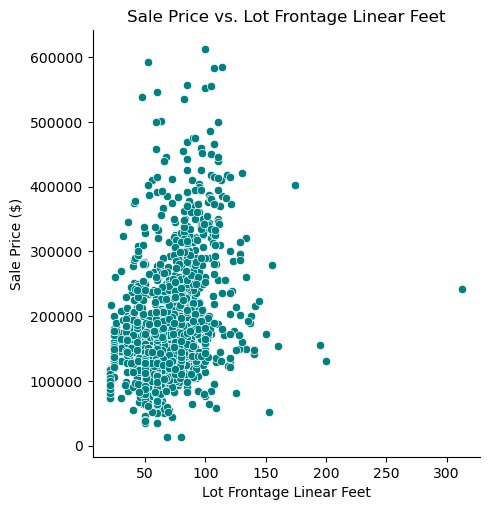

In [28]:
sns.relplot(y='saleprice', 
            x='lot_frontage', 
            data=train,
            color='teal').set(title='Sale Price vs. Lot Frontage Linear Feet', 
                              xlabel='Lot Frontage Linear Feet',
                              ylabel='Sale Price ($)');

It looks like there may be an outlier with a property with over 300 feet connected to the street.

Checking the distribution

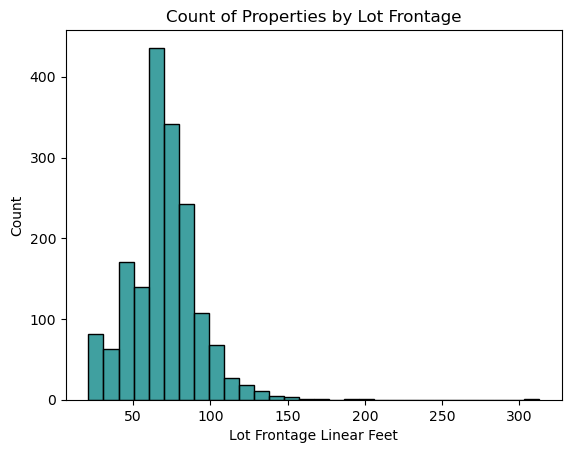

In [29]:
sns.histplot(train, 
             x='lot_frontage',
             color='teal',
             bins=30).set(title='Count of Properties by Lot Frontage',
                          xlabel='Lot Frontage Linear Feet');

In [30]:
train.lot_frontage.describe()

count    1719.000000
mean       68.878999
std        22.472112
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lot_frontage, dtype: float64

As indicated by the distribution and the descriptive statistics, the mean is about 69 linear feet of property connected to the street.

In [31]:
np.nanmedian(train.lot_frontage)

68.0

There are only a few outliers with lot frontage > ~170.  I think imputing the median will suffice here for the missing values.  Additionally the mean and the median are close to each other so I think this should be ok.

In [32]:
train.lot_frontage.fillna(
    np.nanmedian(train.lot_frontage),
    inplace=True
)

test.lot_frontage.fillna(
    np.nanmedian(test.lot_frontage),
    inplace=True
)

Check the distribution again

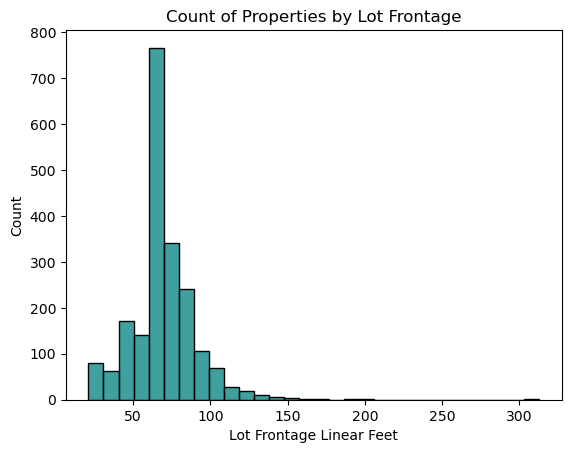

In [33]:
sns.histplot(train, 
             x='lot_frontage',
             color='teal',
             bins=30).set(title='Count of Properties by Lot Frontage',
                          xlabel='Lot Frontage Linear Feet');

There is a clear spike in the distribution now around the median, but I think this treatment is ok for now, but we may need to revisit if this becomes an issue in modeling.

Investigating some of the grouped values that seemed to have similar null counts.  Looking at garage data first.

In [34]:
gar_cols = [col for col in train.columns if col.find('garage') != -1]
gar_cols

['garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_cond']

In [35]:
train[train.garage_yr_blt.isnull()][gar_cols]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond
28,NaN,NaN,NaN,0.0,0.0,NaN,NaN
53,NaN,NaN,NaN,0.0,0.0,NaN,NaN
65,NaN,NaN,NaN,0.0,0.0,NaN,NaN
79,NaN,NaN,NaN,0.0,0.0,NaN,NaN
101,NaN,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
1991,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2010,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2027,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2039,NaN,NaN,NaN,0.0,0.0,NaN,NaN


These look to be properties with no garage.  Seeing if there are any records that might indicate values for garage_cars or garage_area in this data.

In [36]:
train[(train.garage_type.isnull()) & 
     ((train.garage_cars > 0) | (train.garage_area > 0))
    ][gar_cols]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond


Since it appears that these nulls are representing that there is no garage, I'll fill in these values.

These are the nominal garage fields that can have NA for no garage instead of null:
- `garage_type`
- `garage_finish`
- `garage_qual`
- `garage_cond`

In [37]:
for gar in ['garage_type',
            'garage_finish',
            'garage_qual',
            'garage_cond']:
    train[gar].fillna('no value', inplace=True)
    test[gar].fillna('no value', inplace=True)

I don't think the year the garage was built is important.  Since the missing are dependent on there actually being a garage, I'm setting these missing values to 0.

In [38]:
train.garage_yr_blt.fillna(0, inplace=True)
test.garage_yr_blt.fillna(0, inplace=True)

Basement data is the next group. This is important to our analysis concerning unfinished basements.

In [39]:
bsmt_cols = [col for col in train.columns if col.find('bsmt') != -1]
bsmt_cols

['bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'bsmt_full_bath',
 'bsmt_half_bath']

From the null data previously displayed:

- bsmt_exposure      58
- bsmtfin_type_2     56
- bsmt_qual          55
- bsmt_cond          55
- bsmtfin_type_1     55

bsmt_exposure had the most nulls.  Looking at related bsmt data for that superset.

In [40]:
# below code was used to look at more basement data to visually identify patterns
# which is summarized in the next cell
# I've commented this out so it doesn't add unnecessary length to the notebook

# train[train.bsmt_exposure.isnull()][bsmt_cols]

Observations from this data:
- record index 1327 looks suspicious since all the values are null, which is unique to that record - dropping this record
- there are three records that look like they need more attention ([1456, 1547, 1997]). They appear to have basements, but some values are missing.
    - since there are only 3 of these cases where it appears there is a basement but the exposure isn't stated, I'll pick a value based on values of houses with basements and choose the most common
    
Drop 1327 and Get value_counts for houses with more than 0 bsmt square feet

In [41]:
train.drop(1327, inplace=True)

In [42]:
train[train.total_bsmt_sf > 0]['bsmt_exposure'].value_counts(normalize=True)

No    0.672526
Av    0.144651
Gd    0.100954
Mn    0.081868
Name: bsmt_exposure, dtype: float64

Looks like the majority of basements in ames have No exposure, so setting our 3 records to that value.

In [43]:
train.loc[[1456, 1547, 1997], 'bsmt_exposure'] = 'No'

After re-running the query a few cells above, I confirm that those records are no longer displayed.  I'll now treat all the nominal bsmt features with the NA value indicating there is no basement.

basement features that have NA options:
bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type1, bsmtfin_type2

In [44]:
train.fillna({'bsmt_qual': 'no value', 
             'bsmt_cond': 'no value', 
             'bsmt_exposure': 'no value', 
             'bsmtfin_type_1': 'no value', 
             'bsmtfin_type_2': 'no value'
            }, inplace=True)

test.fillna({'bsmt_qual': 'no value', 
             'bsmt_cond': 'no value', 
             'bsmt_exposure': 'no value', 
             'bsmtfin_type_1': 'no value', 
             'bsmtfin_type_2': 'no value'
            }, inplace=True)

Checking overall null composition again

In [45]:
train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)

mas_vnr_type      22
mas_vnr_area      22
bsmt_full_bath     1
bsmt_half_bath     1
garage_cars        1
garage_area        1
dtype: int64

Investigate the Masonry related feature nulls.

Look for observations where masonry veneer area is greater than 0 to see if any possibly related cells, like exterior information may provide any sort of pattern to use for imputing values.

In [46]:
train[train['mas_vnr_area'] > 0][['mas_vnr_type', 
                                  'mas_vnr_area', 
                                  'exterior_1st', 
                                  'exterior_2nd']]

,mas_vnr_type,mas_vnr_area,exterior_1st,exterior_2nd
0,BrkFace,289.0,HdBoard,Plywood
1,BrkFace,132.0,VinylSd,VinylSd
6,BrkFace,82.0,VinylSd,VinylSd
7,BrkFace,180.0,Plywood,Plywood
9,BrkFace,192.0,Plywood,Plywood
...,...,...,...,...
2038,BrkFace,98.0,HdBoard,HdBoard
2039,BrkFace,189.0,CemntBd,CmentBd
2041,BrkFace,664.0,VinylSd,VinylSd
2044,BrkFace,38.0,VinylSd,VinylSd


Look at the same features, now where masonry veneer area is null

In [47]:
train[train['mas_vnr_area'].isnull()][['mas_vnr_type', 
                                       'mas_vnr_area', 
                                       'exterior_1st', 
                                       'exterior_2nd']]

,mas_vnr_type,mas_vnr_area,exterior_1st,exterior_2nd
22,NaN,NaN,CemntBd,CmentBd
41,NaN,NaN,VinylSd,VinylSd
86,NaN,NaN,VinylSd,VinylSd
212,NaN,NaN,VinylSd,VinylSd
276,NaN,NaN,VinylSd,VinylSd
338,NaN,NaN,WdShing,Wd Shng
431,NaN,NaN,VinylSd,VinylSd
451,NaN,NaN,VinylSd,VinylSd
591,NaN,NaN,VinylSd,VinylSd
844,NaN,NaN,VinylSd,VinylSd


Check the unique values for masonry veneer type

In [48]:
train['mas_vnr_type'].unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

There doesn't appear to be any other data that we could use to infer these values.  Assuming that NaN means none and filling area with 0.

In [49]:
train.mas_vnr_type.fillna('None', inplace=True)
train.mas_vnr_area.fillna(0, inplace=True)
test.mas_vnr_type.fillna('None', inplace=True)
test.mas_vnr_area.fillna(0, inplace=True)

In [50]:
# check remaining nulls
train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)

bsmt_full_bath    1
bsmt_half_bath    1
garage_cars       1
garage_area       1
dtype: int64

Dropping remaining nulls.

In [51]:
train.dropna(inplace=True)

In [52]:
train.shape, test.shape

((2046, 72), (878, 71))

## Combining Features

### Square Footage, Basement, and Bathroom 

Trying to combine some feature data to have fewer, more meaningful features.

I'd like to figure out or calculate interior square footage.  There are multiple columns that represent some measures of sq_ft.  I believe the ones that will be involved in what I'm looking for:

`['bsmtfin_sf_1',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 '1st_flr_sf',
 '2nd_flr_sf',
 'gr_liv_area',
 'garage_area']`
 
 I'll start with these values and continue investigating.

In [53]:
train[['bsmtfin_sf_1',  
      'bsmtfin_sf_2',  
      'bsmt_unf_sf',  
      'total_bsmt_sf',  
      '1st_flr_sf',  
      '2nd_flr_sf',  
      'gr_liv_area',  
      'garage_area']].head()

,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,garage_area
0,533.0,0.0,192.0,725.0,725,754,1479,475.0
1,637.0,0.0,276.0,913.0,913,1209,2122,559.0
2,731.0,0.0,326.0,1057.0,1057,0,1057,246.0
3,0.0,0.0,384.0,384.0,744,700,1444,400.0
4,0.0,0.0,676.0,676.0,831,614,1445,484.0


- It appears that gr_liv_area is equal to the 1st and 2nd flr values combined.
- Also appears that total basement includes both finished values plus the unfinished.

Since basement refinishing is possibly of interest, in the data dictionary there does appear to be indications that you can mark "Un" for unfinished in the finished type, so will need to investigate that as well.

In [54]:
train[(train.bsmtfin_type_1 == 'Un') | (train.bsmtfin_type_2 == 'Un')]

,id,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,...,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,mo_sold,yr_sold,sale_type,saleprice


Now that I'm more confident that there are no "unfinished" finished basement categorizations, I'm going to start cleaning up these square footage features.

Dropping 1st and 2nd floor features, as well as bsmtfin 1 and 2 since these can all be calculated or inferred from other values.

In [55]:
train.drop(['bsmtfin_sf_1',  
           'bsmtfin_sf_2',
           '1st_flr_sf',
           '2nd_flr_sf'
          ], axis=1, inplace=True)

test.drop(['bsmtfin_sf_1',  
           'bsmtfin_sf_2',
           '1st_flr_sf',
           '2nd_flr_sf'
          ], axis=1, inplace=True)

I also want to get bedrooms and bathrooms combined since I believe the importance is of the values together and not necessarily the location--meaning if there are bathrooms in the basement and bathrooms above grade, that may not be important for the price model.  Although basements are of interest, if there are bathrooms, I'm going to assume that they are finished and not part of any target for remodeling of unfinished space.

In [56]:
train['tot_baths'] = train['bsmt_full_bath'] +\
                    (train['bsmt_half_bath'] * .5) +\
                    train['full_bath'] +\
                    (train['half_bath'] * .5)

test['tot_baths'] = test['bsmt_full_bath'] +\
                    (test['bsmt_half_bath'] * .5) +\
                    test['full_bath'] +\
                    (test['half_bath'] * .5)

Checking to make sure those calculations worked.

In [57]:
train[train['bsmt_half_bath'] > 0][['bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath','tot_baths']]

,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,tot_baths
9,0.0,1.0,1,2,2.5
58,0.0,1.0,1,0,1.5
64,0.0,1.0,1,0,1.5
72,0.0,1.0,1,0,1.5
88,0.0,1.0,2,0,2.5
...,...,...,...,...,...
1947,1.0,1.0,2,0,3.5
1968,0.0,1.0,2,0,2.5
1998,0.0,1.0,2,0,2.5
2009,0.0,1.0,1,0,1.5


Dropping features that were used to calculate the totals.

In [58]:
train.drop(['bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath'], 
         axis=1, inplace=True)

test.drop(['bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath'], 
         axis=1, inplace=True)

Looking at garage_area and other garage features to see what might be correlated between them. Meaning if number of cars and area are closely related, we should just keep one of those features.

In [59]:
train[[col for col in train.columns if col.find('garage') != -1]].corr()

,garage_yr_blt,garage_cars,garage_area
garage_yr_blt,1.000000,0.587125,0.557817
garage_cars,0.587125,1.000000,0.897040
garage_area,0.557817,0.897040,1.000000


Garage cars and garage area have a strong correlation (~0.90).  Since we have other features of interest in sf, will drop garage_cars in lieu of area.

In [60]:
train.drop('garage_cars', axis=1, inplace=True)
test.drop('garage_cars', axis=1, inplace=True)

I also think that having a single "total square feet" feature might be interesting.  I will create this by adding the total basement square footage with the above grade square footage. Also, for model interpretability later on, I'll also add a bsmt_fin_sf as it may be easier to understand the affect that increasing finished square feet have on price instead of the affect of decreasing unfinished square feet.  This could cause some collinearity, but we will handle that in our modeling.

In [61]:
# calculate total square feet for both train and test
train['tot_sf'] = train['total_bsmt_sf'] + train['gr_liv_area']
test['tot_sf'] = test['total_bsmt_sf'] + test['gr_liv_area']

In [62]:
# calculate finished square feet for basement
train['bsmt_fin_sf'] = train['total_bsmt_sf'] - train['bsmt_unf_sf']
test['bsmt_fin_sf'] = test['total_bsmt_sf'] - test['bsmt_unf_sf']

Check to make sure that the calculations worked as anticipated

In [63]:
train[['bsmt_unf_sf', 
       'bsmt_fin_sf',
       'total_bsmt_sf', 
       'gr_liv_area', 
       'tot_sf', ]]

,bsmt_unf_sf,bsmt_fin_sf,total_bsmt_sf,gr_liv_area,tot_sf
0,192.0,533.0,725.0,1479,2204.0
1,276.0,637.0,913.0,2122,3035.0
2,326.0,731.0,1057.0,1057,2114.0
3,384.0,0.0,384.0,1444,1828.0
4,676.0,0.0,676.0,1445,2121.0
...,...,...,...,...,...
2046,873.0,1011.0,1884.0,1728,3612.0
2047,599.0,262.0,861.0,861,1722.0
2048,896.0,0.0,896.0,1913,2809.0
2049,295.0,905.0,1200.0,1200,2400.0


Calculate the mean of some common housing features:

In [64]:
train[['tot_sf', 
       'tot_baths', 
       'saleprice', 
       'garage_area', 
       'bedroom_abvgr']].mean()

tot_sf             2548.707722
tot_baths             2.219697
saleprice        181493.596774
garage_area         472.898827
bedroom_abvgr         2.843109
dtype: float64

**Mean basic property information:**
- 2548 sq ft
- 2.8 bedrooms
- 2.2 bathrooms
- $181,494 sale price


---

## Exploratory Data Analysis

In this section, we'll start exploring more aspects of the data, performing visualizations to further understand this information in a more meaningful way before moving to any modeling activity in later notebooks.

### Feature Investigation
Start visualizing some of the features when haven't looked at yet to learn more about their makeup.

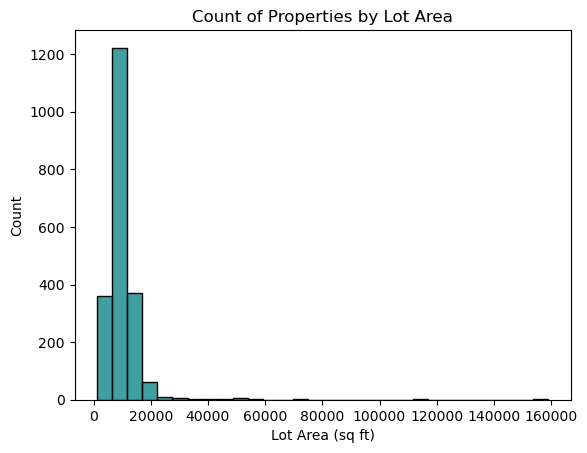

In [65]:
sns.histplot(train, 
             x='lot_area',
             color='teal',
             bins=30).set(title='Count of Properties by Lot Area',
                          xlabel='Lot Area (sq ft)');

In [66]:
train['lot_area'].describe()

count      2046.000000
mean      10009.070381
std        6561.923426
min        1300.000000
25%        7500.000000
50%        9417.500000
75%       11500.000000
max      159000.000000
Name: lot_area, dtype: float64

Lot areas are approximately normally distributed, there is a significant right-skew, so we might need to treat this for our model.  Given the high count of observations around the mean, I'm not sure how significant this would be for our models.

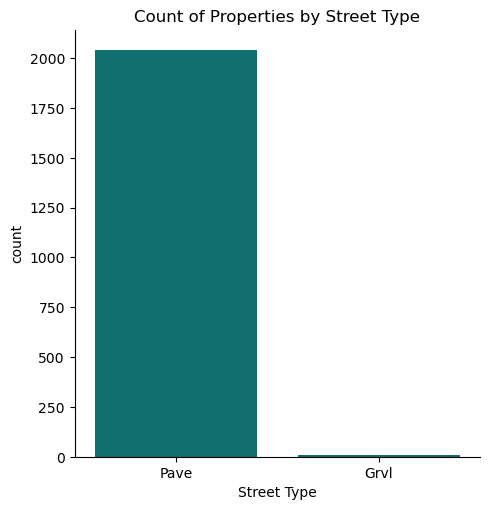

In [67]:
sns.catplot(data=train,
           x='street',
           kind='count', 
           color='teal').set(title='Count of Properties by Street Type',
                             xlabel='Street Type');

In [68]:
train['street'].value_counts(normalize=True)

Pave    0.996579
Grvl    0.003421
Name: street, dtype: float64

Street appears to be almost completely paved.  Dropping this feature.

In [69]:
train.drop('street', axis=1, inplace=True)
test.drop('street', axis=1, inplace=True)

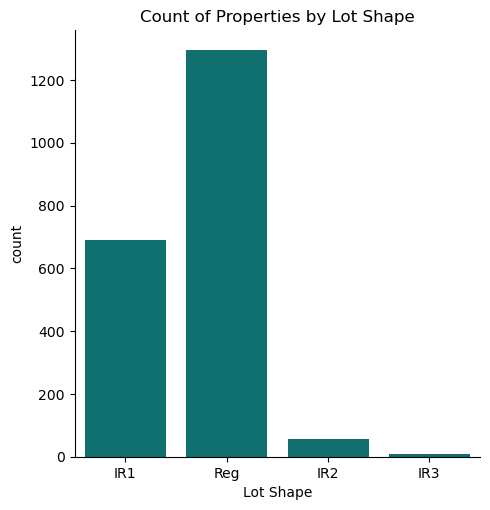

In [70]:
sns.catplot(data=train,
           x='lot_shape',
           kind='count',
           color='teal').set(title='Count of Properties by Lot Shape', 
                             xlabel='Lot Shape');

The above plot shows that the majority of properties have a regular or slightly irregular lot shape.  Very few properties fall into the moderately or irregular categories.

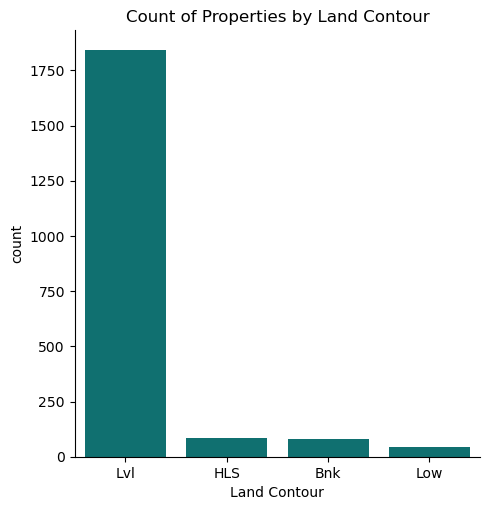

In [71]:
sns.catplot(data=train,
           x='land_contour',
           kind='count', 
           color='teal').set(title='Count of Properties by Land Contour',
                             xlabel='Land Contour');

Almost all the properties in this data set have a level contour.

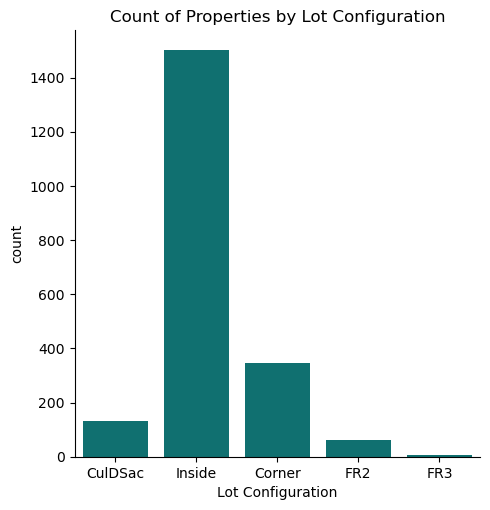

In [72]:
sns.catplot(data=train,
           x='lot_config',
           color='teal',
           kind='count').set(title='Count of Properties by Lot Configuration',
                             xlabel='Lot Configuration');

The majority of lots are inside configuration--very few have frontage on 2 or 3 sides or are located on a cul-de-sac.

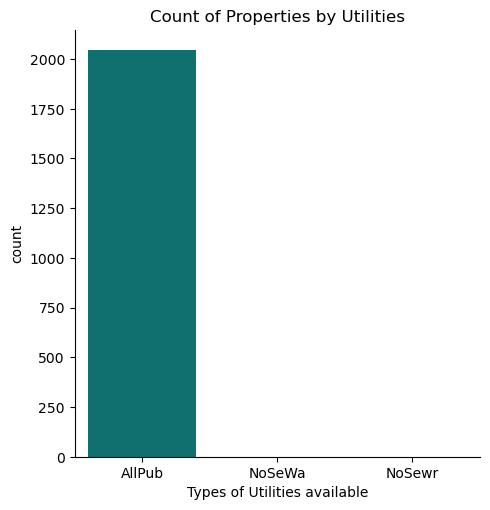

In [73]:
sns.catplot(data=train,
           x='utilities',
           color='teal',
           kind='count').set(title='Count of Properties by Utilities', 
                            xlabel='Types of Utilities available');

Utilities is another case where there are so many observations with the same value that the feature should be dropped.

In [74]:
train.drop('utilities', axis=1, inplace=True)
test.drop('utilities', axis=1, inplace=True)

**Lot summary**
A 'typical' lot appears to be:
- 68 Linear Feet of street connected to the property
- Lot area of ~10,000 square feet
- Accessed by paved roads
- Regular or slightly irregular lot shape
- Level ground
- Inside lot
- All public utilities available

Condition is another interesting feature I would like to investigate.

Condition (Nominal): Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

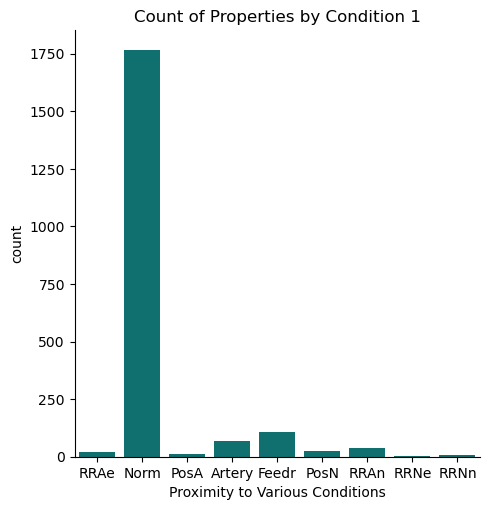

In [75]:
sns.catplot(data=train,
           x='condition_1',
           kind='count',
           color='teal').set(title='Count of Properties by Condition 1',
                             xlabel='Proximity to Various Conditions');

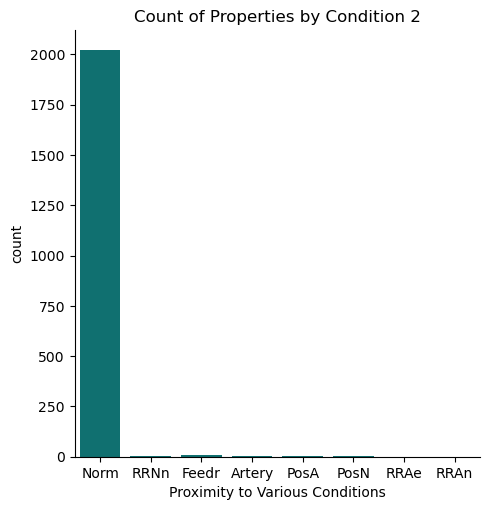

In [76]:
sns.catplot(data=train,
           x='condition_2',
           kind='count',
           color='teal').set(title='Count of Properties by Condition 2',
                             xlabel='Proximity to Various Conditions');

Look at these condition features in relationship to sale price.

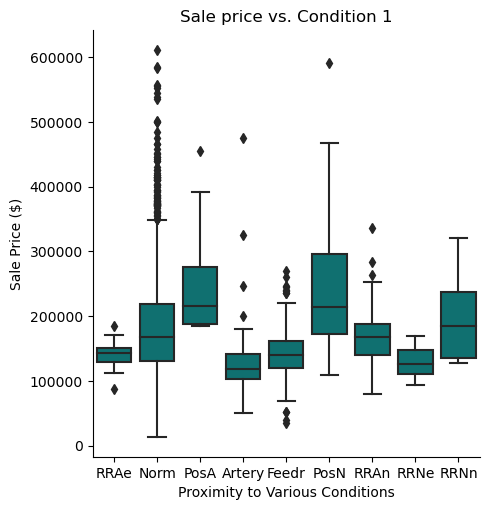

In [77]:
sns.catplot(x='condition_1',
            y='saleprice',
            data=train,
            kind='box',
            color='teal').set(title='Sale price vs. Condition 1',
                              xlabel='Proximity to Various Conditions',
                              ylabel='Sale Price ($)');

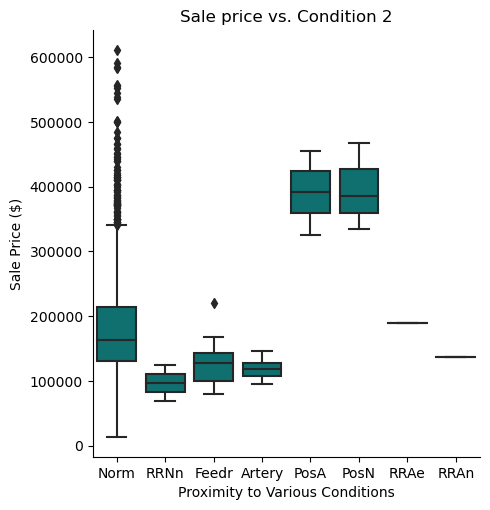

In [78]:
sns.catplot(x='condition_2',
            y='saleprice',
            data=train,
            kind='box',
            color='teal').set(title='Sale price vs. Condition 2',
                              xlabel='Proximity to Various Conditions',
                              ylabel='Sale Price ($)');

Conditions seem to be heavily skewed towards "normal" with many outliers in sale price.  Dropping these features as well.

In [79]:
train.drop('condition_1', axis=1, inplace=True)
train.drop('condition_2', axis=1, inplace=True)
test.drop('condition_1', axis=1, inplace=True)
test.drop('condition_2', axis=1, inplace=True)

Bldg Type (Nominal): Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

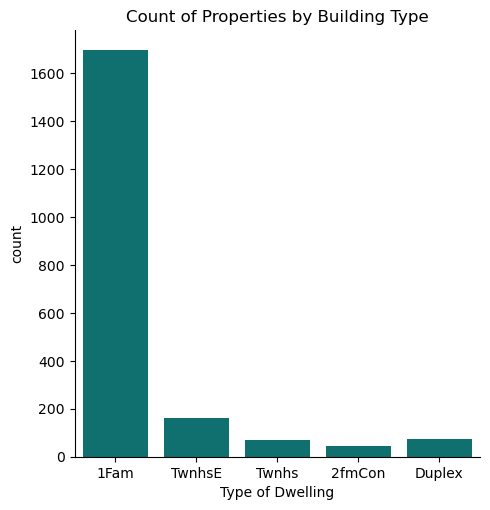

In [80]:
sns.catplot(data=train,
           x='bldg_type',
           kind='count',
           color='teal').set(title='Count of Properties by Building Type',
                             xlabel='Type of Dwelling');

In [81]:
train['bldg_type'].value_counts()

1Fam      1695
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: bldg_type, dtype: int64

House Style (Nominal): Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

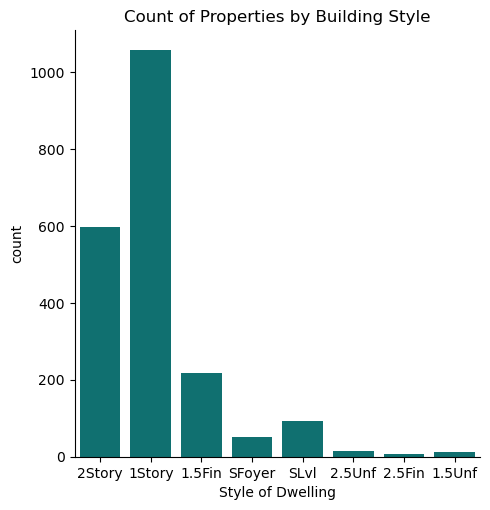

In [82]:
sns.catplot(data=train,
           x='house_style',
           kind='count',
           color='teal').set(title='Count of Properties by Building Style',
                             xlabel='Style of Dwelling');

In [83]:
train['house_style'].value_counts()

1Story    1056
2Story     596
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: house_style, dtype: int64

There is definitely some variation in both type and style of house.  Will leave these features alone.

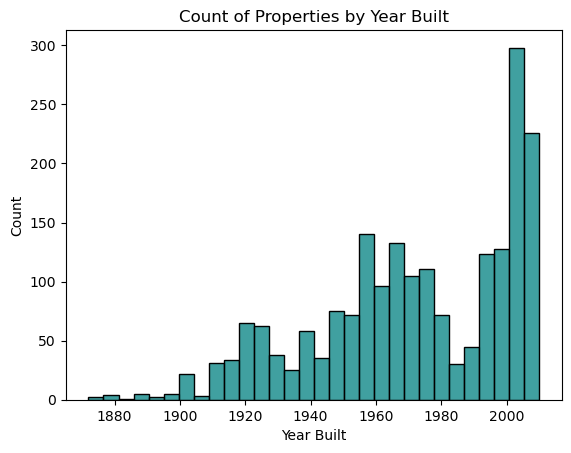

In [84]:
sns.histplot(train, 
             x='year_built',
             color='teal',
             bins=30).set(title='Count of Properties by Year Built',
                          xlabel='Year Built');

Many of the houses that are in this data are newer construction. Almost like there was a housing boom after the year 2000.  Since we are addressing remodeling, and age might be a factor in targeting, let's try to extract some additional information.

In [85]:
train[train['year_built'] < 2000]['year_built'].count()/\
len(train)

0.7262952101661779

Almost 73% of the houses in the data provided were built before the year 2000.

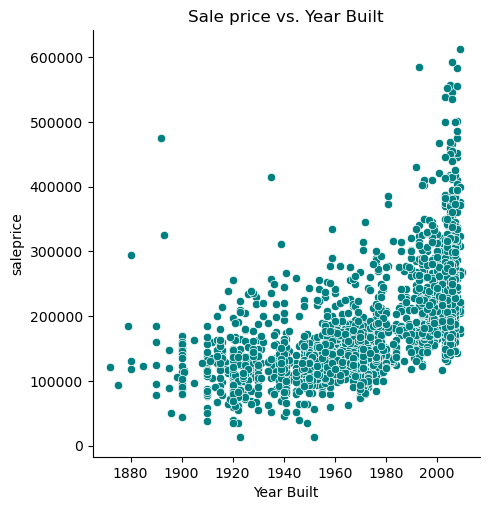

In [86]:
sns.relplot(data=train,
            x='year_built',
            y='saleprice',
            color='teal',
            kind='scatter').set(title='Sale price vs. Year Built', 
                                xlabel='Year Built');

This may not be the most informative, meaning that I don't necessarily think that high price observations on some of the older homes are outlier as there could be older houses that have been restored or other factors that drove up the price.

There is a high count of houses built after 2000.  This dilutes the strength of the relationship with the sale price.  

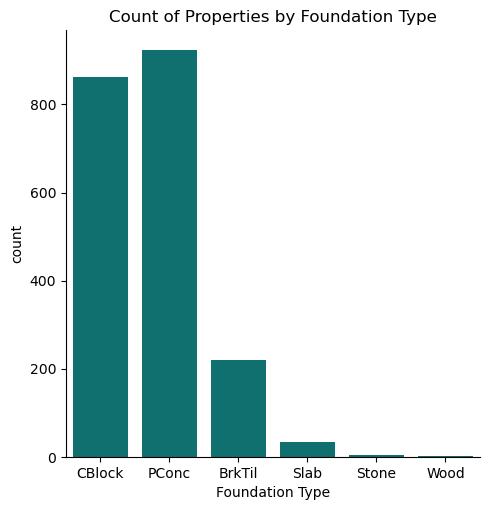

In [87]:
sns.catplot(data=train,
           x='foundation',
           color='teal',
           kind='count').set(title='Count of Properties by Foundation Type',
                             xlabel='Foundation Type');

This shows that the majority of the properties have either a poured concrete or cinder block foundation.

In [88]:
# leaving this out for being able to run all cells efficiently
#sns.pairplot(data=train, corner=True);

Although an eyechart, it looks like some of the most correlated features with sale price are:
- overall quality
- overall condition (not as strong)
- gr_liv_area
- 1st_flr_sf
- total_bsmt_sf
- full_bath
- totrms_abvgrd
- fireplaces
- garage_cars

Features to possibly drop
- mo_sold
- garage_yr_blt

Look at garage_yr_blt in relationship to sale price

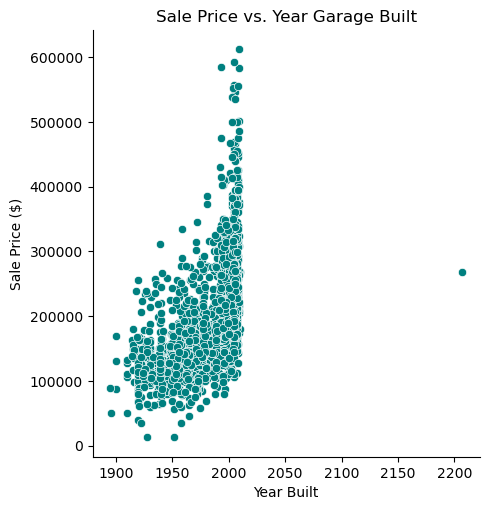

In [89]:
sns.relplot(data=train[train.garage_yr_blt > 0],
            x='garage_yr_blt',
            y='saleprice',
            color='teal',
            kind='scatter').set(title='Sale Price vs. Year Garage Built', 
                                xlabel='Year Built', 
                                ylabel='Sale Price ($)');

There is a clear outlier here with a year built in the future.  Like the house year built data, it looks like there is a concentration after the year 2000, but looking at the plot without the outlier:

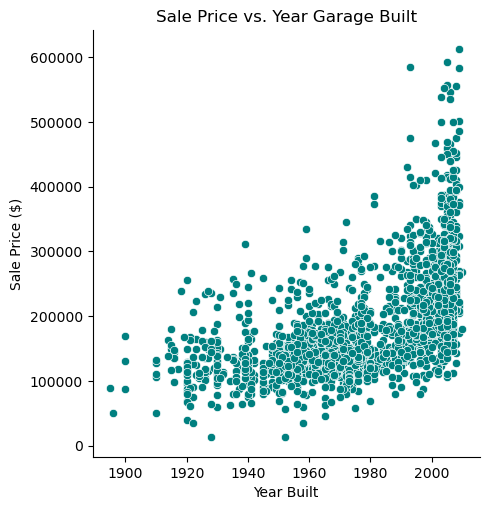

In [90]:
sns.relplot(data=train[(train.garage_yr_blt > 0) & 
                       (train.garage_yr_blt < 2022)],
            x='garage_yr_blt',
            y='saleprice',
            color='teal',
            kind='scatter').set(title='Sale Price vs. Year Garage Built', 
                                xlabel='Year Built', 
                                ylabel='Sale Price ($)');

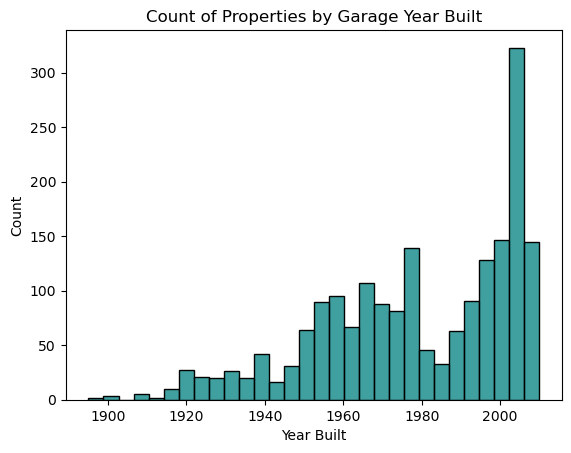

In [91]:
sns.histplot(data=train[(train.garage_yr_blt > 0) & 
                       (train.garage_yr_blt < 2022)],
             x='garage_yr_blt',
             color='teal',
             bins=30).set(title='Count of Properties by Garage Year Built',
                          xlabel='Year Built');

Due to the high concentration of these values beyond the year 2000 I'm going to drop this feature from the data set.

In [92]:
train.drop('garage_yr_blt', axis=1, inplace=True)
test.drop('garage_yr_blt', axis=1, inplace=True)

Start looking at some descriptive stats on features.

In [93]:
train.select_dtypes(include='number').describe()

,id,lot_frontage,lot_area,overall_qual,overall_cond,year_built,mas_vnr_area,bsmt_unf_sf,total_bsmt_sf,low_qual_fin_sf,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,mo_sold,yr_sold,saleprice,tot_baths,tot_sf,bsmt_fin_sf
count,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,...,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000
mean,1473.355816,68.705279,10009.070381,6.110459,5.561095,1971.716031,97.880254,567.928152,1054.159824,5.526393,...,47.111926,22.523460,2.597752,16.551808,6.222874,2007.776149,181493.596774,2.219697,2548.707722,486.231672
std,844.693203,20.549699,6561.923426,1.421634,1.104749,30.167552,172.021682,445.023859,425.832871,51.130535,...,65.496865,59.763267,25.260113,57.438484,2.742972,1.313365,79285.959643,0.804783,766.148683,462.124841
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,1.000000,334.000000,0.000000
25%,752.250000,60.000000,7500.000000,5.000000,5.000000,1954.000000,0.000000,220.000000,793.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129812.500000,2.000000,2011.000000,0.000000
50%,1480.500000,68.000000,9417.500000,6.000000,5.000000,1974.000000,0.000000,475.000000,994.500000,0.000000,...,26.500000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000,2.000000,2457.000000,455.000000
75%,2198.500000,78.000000,11500.000000,7.000000,6.000000,2001.000000,158.000000,811.000000,1317.750000,0.000000,...,70.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,3.000000,2996.000000,793.500000
max,2930.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,1600.000000,2336.000000,3206.000000,1064.000000,...,547.000000,432.000000,508.000000,490.000000,12.000000,2010.000000,611657.000000,7.000000,6428.000000,2461.000000


The basic descriptive stats look reasonable for the numeric values.  Checking some distributions.

I'll start by looking at the target.

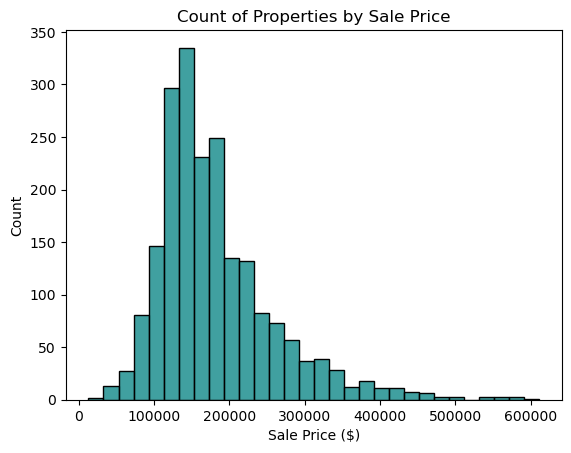

In [94]:
sns.histplot(data=train,
             x='saleprice',
             color='teal',
             bins=30).set(title='Count of Properties by Sale Price',
                          xlabel='Sale Price ($)');

This is approximately normally distributed with a right skew.  Since these are all real observations and this is data from the target, I don't want to do anything to this data.

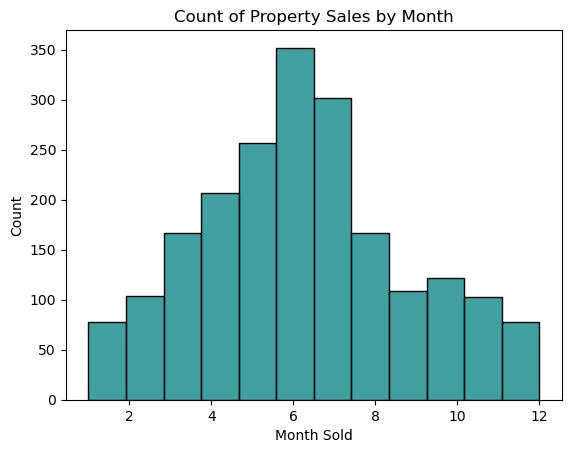

In [95]:
sns.histplot(data=train,
             x='mo_sold',
             color='teal',
             bins=12).set(title='Count of Property Sales by Month',
                          xlabel='Month Sold');

Looks like June and July are the most common months that houses are sold.  There could be possible explnations for this, like it being a college town some seasonality in the data due to that. Let's check to see if there is any relationship with sale price.

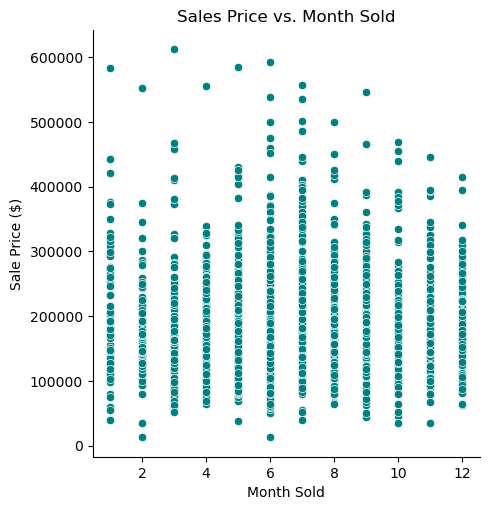

In [96]:
sns.relplot(data=train, 
            x='mo_sold', 
            y='saleprice', 
            color='teal',
            kind='scatter').set(title='Sales Price vs. Month Sold',
                                xlabel='Month Sold', 
                                ylabel='Sale Price ($)');

I'm not seeing any shape to this relationship, so another feature that I'll drop as I believe this won't be meaningful in the models.

In [97]:
train.drop('mo_sold', axis=1, inplace=True)
test.drop('mo_sold', axis=1, inplace=True)

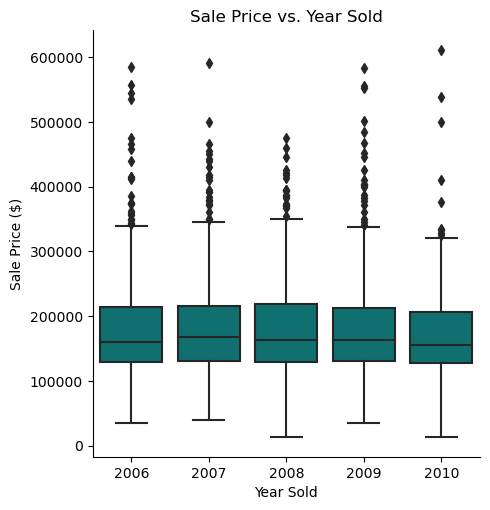

In [98]:
sns.catplot(data=train,
            x='yr_sold', 
            y='saleprice',
            kind='box',
            color='teal'
           ).set(title='Sale Price vs. Year Sold', 
                 xlabel='Year Sold', 
                 ylabel='Sale Price ($)');

It's fairly interesting how the housing crisis of 2008 shows up in the data.  It appears that there was downward pressure on sale prices, but also that the quartile values seem to have a larger spread. There are many outliers, but since they seem to be somewhat consistent, I think these are natrual variations since they seem similar year to year and they fit with the histogram.

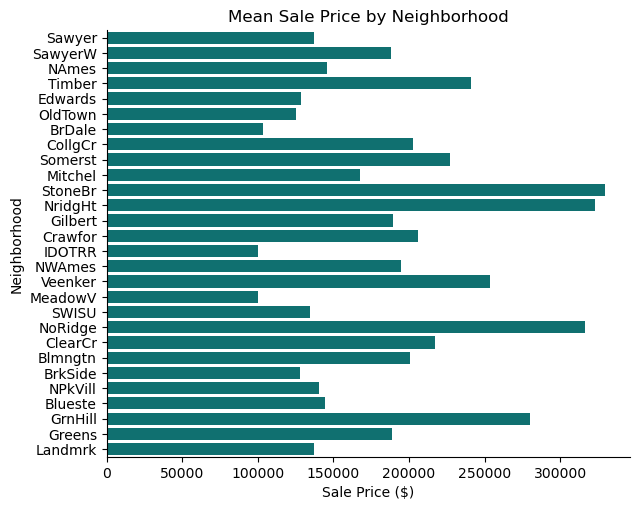

In [99]:
sns.catplot(y='neighborhood',
            x='saleprice', 
            data=train,
            kind='bar',
            aspect=1.3,
            color='teal', 
            errorbar=None).set(title='Mean Sale Price by Neighborhood',
                               xlabel='Sale Price ($)', 
                               ylabel='Neighborhood');

There seems to be a large variance in the sale price based on the neighborhood--this feels like it should be included in a model for predicting sale price.

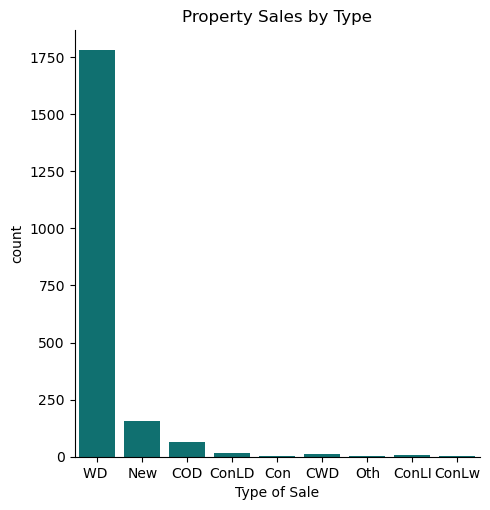

In [100]:
sns.catplot(x='sale_type', 
            data=train,
            kind='count',
            color='teal').set(title='Property Sales by Type', 
                              xlabel='Type of Sale');

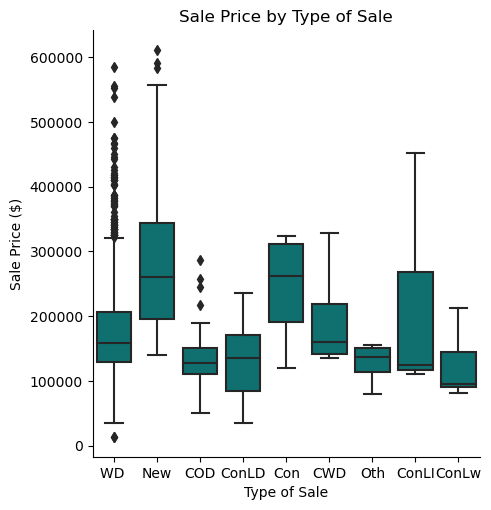

In [101]:
sns.catplot(x='sale_type', 
            y='saleprice',
            data=train,
            kind='box',
            color='teal').set(title='Sale Price by Type of Sale', 
                              xlabel='Type of Sale', 
                              ylabel='Sale Price ($)');

There is a clear concentration in "Warranty Deed - Conventional", which sounds like it would be the expected type of sale based on the name.

In [102]:
train.sale_type.value_counts(normalize=True).mul(100)

WD       86.950147
New       7.722385
COD       3.079179
ConLD     0.782014
CWD       0.488759
ConLI     0.342131
ConLw     0.244379
Con       0.195503
Oth       0.195503
Name: sale_type, dtype: float64

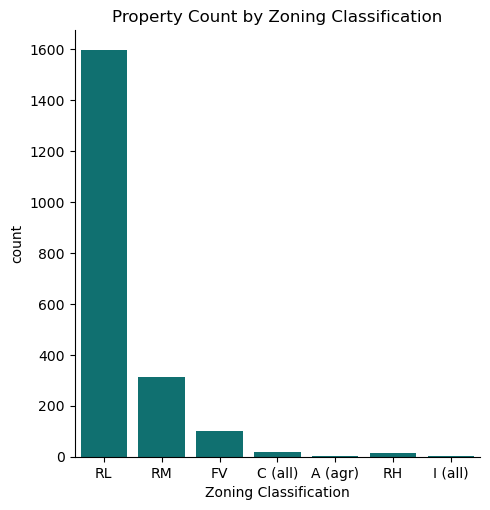

In [103]:
sns.catplot(data=train,
            x='ms_zoning',
            kind='count',
            color='teal').set(title='Property Count by Zoning Classification', 
                              xlabel='Zoning Classification');

The bulk of the properties are Residential Low Density (RL) or Residential Medium Density (RM).

In [104]:
train.ms_zoning.value_counts(normalize=True).mul(100)

RL         77.956989
RM         15.347019
FV          4.936461
C (all)     0.928641
RH          0.684262
A (agr)     0.097752
I (all)     0.048876
Name: ms_zoning, dtype: float64

As we saw above, over over 93% of the properties fall in the RL or RM classification.

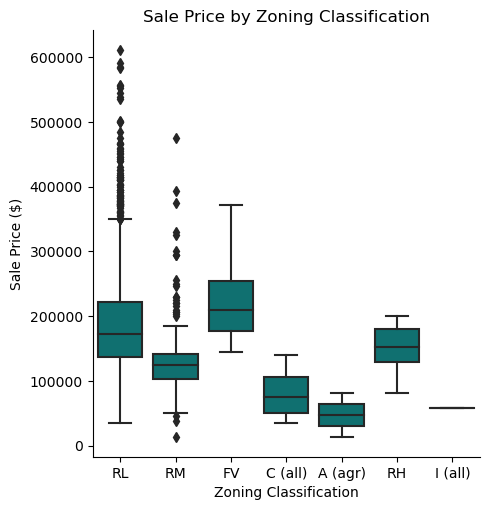

In [105]:
sns.catplot(x='ms_zoning', 
            y='saleprice',
            data=train,
            kind='box',
            color='teal').set(title='Sale Price by Zoning Classification',
                              xlabel='Zoning Classification', 
                              ylabel='Sale Price ($)');

Although both the ms_zoning and sale_type have high concentrations, they do seem to have some affect on price, so I'll leave them alone for now and will handle additional treatment in processing and/or modeling.

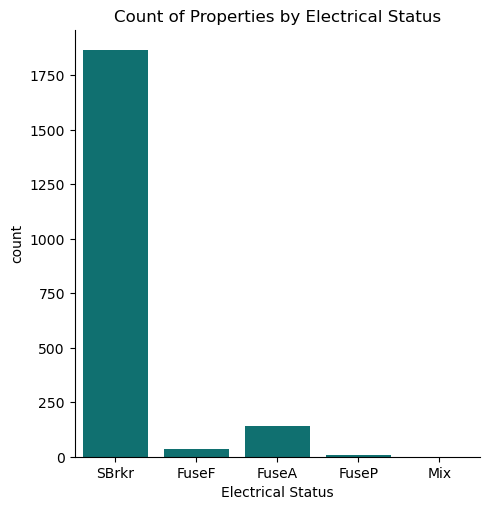

In [106]:
sns.catplot(data=train, 
            x='electrical', 
            color='teal',
            kind='count').set(title='Count of Properties by Electrical Status',
                              xlabel='Electrical Status');

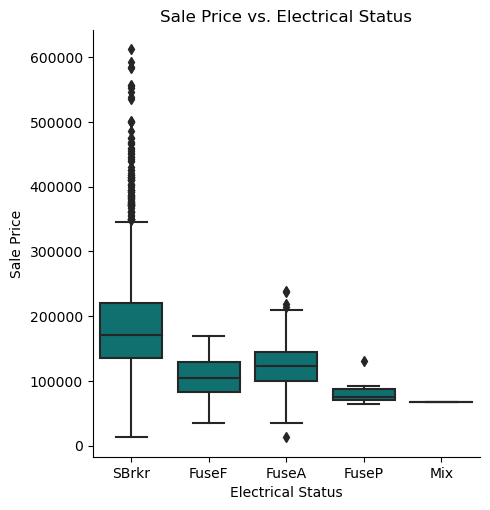

In [107]:
sns.catplot(data=train, 
            x='electrical', 
            y='saleprice', 
            color='teal',
            kind='box').set(title='Sale Price vs. Electrical Status',
                            xlabel='Electrical Status', 
                            ylabel='Sale Price');

Electrical status doesn't seems to be very concentraed on Standard Circuit Breaker and doesn't appear to have much of an impact on price.  Dropping this feature.

In [108]:
train.drop('electrical', axis=1, inplace=True)
test.drop('electrical', axis=1, inplace=True)

Now that features have been reduced, let's plot a heatmap of the correlation between features.

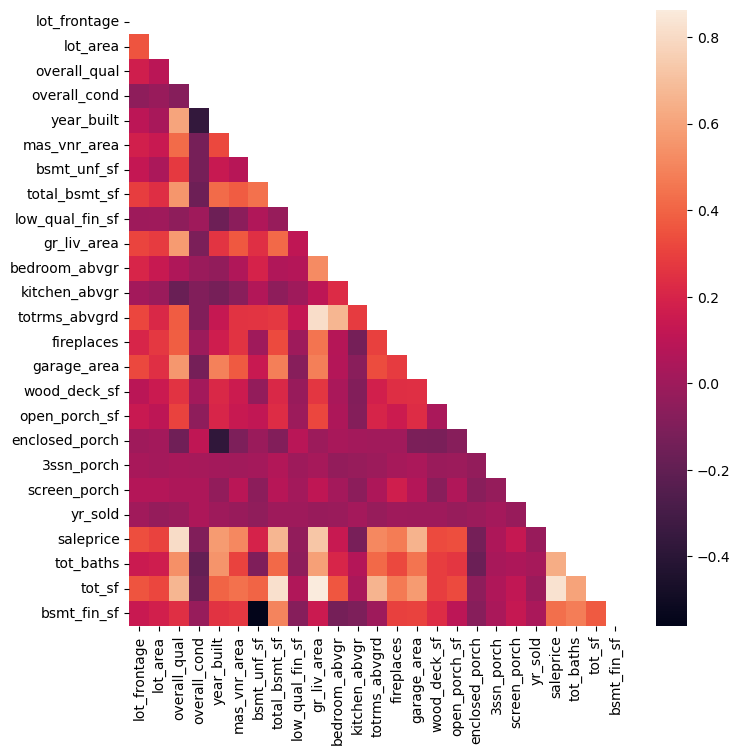

In [109]:
# https://stackoverflow.com/questions/57414771/how-to-plot-only-the-lower-triangle-of-a-seaborn-heatmap
mask = np.zeros_like(train.drop('id', axis=1).corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8,8))

sns.heatmap(train.drop('id', axis=1).corr(), 
            mask=mask);

In this heatmap, there do look to be some positive correlation between some features and sale price, such as:
- overall quality
- total basement square feet
- above grade living area square feet
- number of bathrooms
- bigger garages

### Quality and Condition Data Dive

As we're focused on improvement projects, we'll look at various aspects of the data concerning quality and condition.  There are some general features such as overall quality and condition, but also some specific areas such as basement, kitchen, and "external" that we can look at a bit more closely.

I'd like to also create a feature which represents how much of a basement is finished.  I'm also interested in some additional inquiries to help with decision support for the client:
- What percentage of houses have basements?
- What is the mean percentage of basesment sqaure feet are finished?
- Is there a link between finished basements and higher sale price?
- Does the condition of the house have a relationship to the sale price?
- Does the condition of the basement have a relationship to the sale price?

#### Overall Quality and Condition

Breakdown of overall condition

In [110]:
train['overall_cond'
     ].value_counts(normalize=True).sort_index()

1    0.001955
2    0.002933
3    0.017107
4    0.034213
5    0.569892
6    0.179374
7    0.130987
8    0.049365
9    0.014174
Name: overall_cond, dtype: float64

Let's look at quality <= average (5)

In [111]:
train['overall_cond'
     ].value_counts(normalize=True).sort_index()[:5].sum()

0.626099706744868

63% of the houses are characterized as having an overall condition of average or below

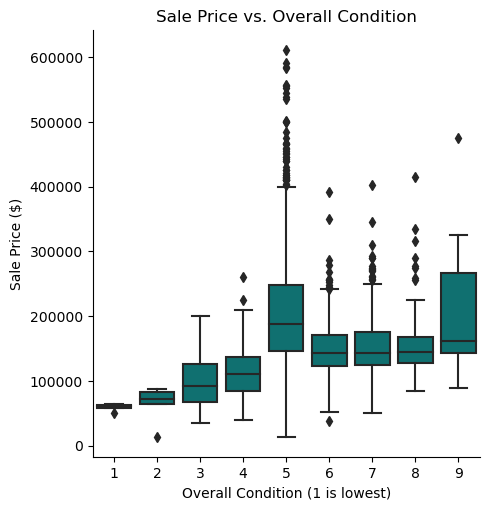

In [112]:
sns.catplot(data=train,
            x='overall_cond',
            y='saleprice', 
            kind='box', 
            color='teal').set(title='Sale Price vs. Overall Condition', 
                                xlabel='Overall Condition (1 is lowest)', 
                                ylabel='Sale Price ($)');

It does look like as the overall reported condition of the property increases, that the sales price increases.  However, it also appears that the majority of houses are average (5) and creates a very wide range of sale prices, but will look at the distribution:

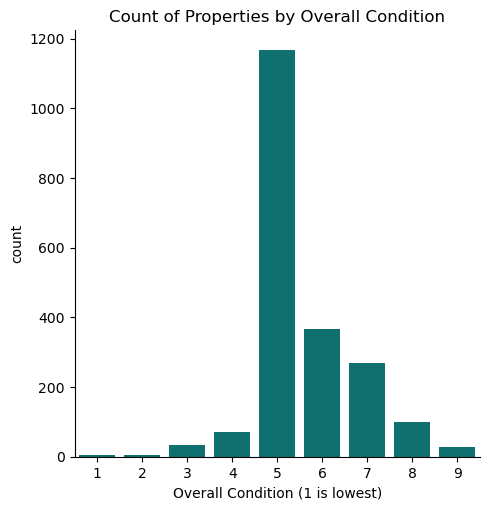

In [113]:
sns.catplot(data=train,
            x='overall_cond',
            kind='count', 
            color='teal'
           ).set(title='Count of Properties by Overall Condition',
                                xlabel='Overall Condition (1 is lowest)');

As we suspected from the previous plot, this shows an overwhelming amount of properties in the 5/average condition category.

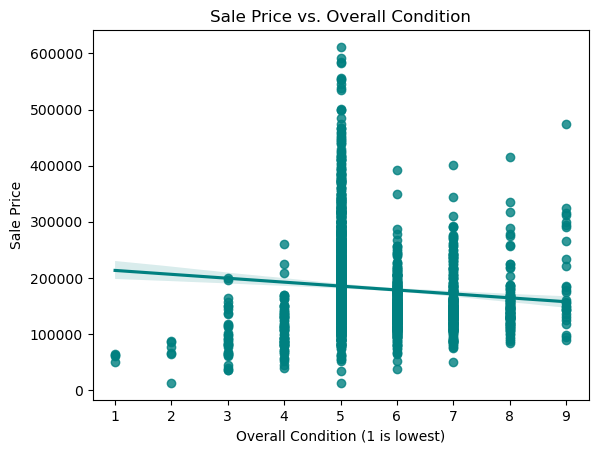

In [114]:
sns.regplot(data=train,
           x='overall_cond', 
           y='saleprice',
           color='teal'
          ).set(title='Sale Price vs. Overall Condition', 
                              xlabel='Overall Condition (1 is lowest)', 
                              ylabel='Sale Price');

Looking at the relationship this way, it appears that there is possibly a slightly negative relationship with sale price, but there are very few records in the 1-4 range, so I think modeling would be needed in order to understand this better.

While we're looking at overall condition, I'll also take a look at overall quality, which describes the quality of the materials.  These two might be another interesting target as polynomial features in modeling.

Breakdown of overall quality

In [115]:
train['overall_qual'
     ].value_counts(normalize=True).sort_index()

1     0.001955
2     0.004399
3     0.014174
4     0.077224
5     0.274194
6     0.247312
7     0.210655
8     0.122190
9     0.037634
10    0.010264
Name: overall_qual, dtype: float64

Let's look at quality <= average (5)

In [116]:
train['overall_qual'
     ].value_counts(normalize=True).sort_index()[:5].sum()

0.37194525904203324

37% of the houses having materials and finish that rate average or below

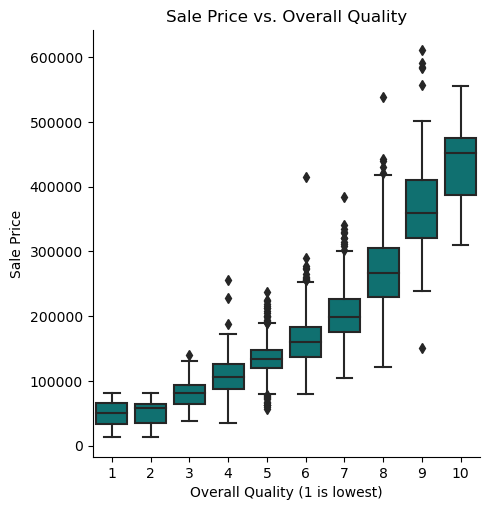

In [117]:
sns.catplot(data=train,
            x='overall_qual',
            y='saleprice', 
            kind='box', 
            color='teal').set(title='Sale Price vs. Overall Quality', 
                                xlabel='Overall Quality (1 is lowest)', 
                                ylabel='Sale Price');

Overall quality seems to have a a relationship with sale price--stronger than the condition, which is an interesting point.

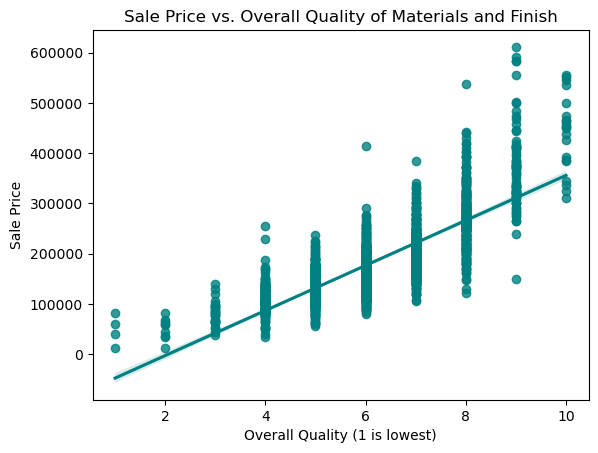

In [118]:
sns.regplot(data=train,
           x='overall_qual', 
           y='saleprice',
           color='teal'
          ).set(title='Sale Price vs. Overall Quality of Materials and Finish', 
                              xlabel='Overall Quality (1 is lowest)', 
                              ylabel='Sale Price');

A slightly different look at Sale Price vs. Quality, and the relationship still looks to have decent strength.

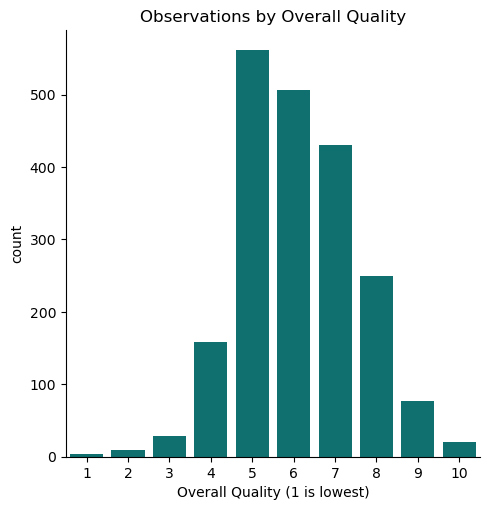

In [119]:
sns.catplot(data=train,
            x='overall_qual',
            kind='count', 
            color='teal').set(title='Observations by Overall Quality', 
                                xlabel='Overall Quality (1 is lowest)');

"Below Average" is rating 4, so this shows that there aren't many properties with Fair, Poor, or Very Poor quality ratings.  Looking at the 3 plots above, there appears to be a stronger relationship of overall quality of the material and finish of the house increasing the sale price.

#### Basement Data

In [120]:
train.bsmt_cond.value_counts(normalize=True).mul(100)

TA          89.491691
Gd           4.349951
Fa           3.176931
no value     2.590420
Po           0.244379
Ex           0.146628
Name: bsmt_cond, dtype: float64

Only about 2.6% of properties in the data are reporting no basement.

In [121]:
train[train['bsmt_cond'] != 'no value'
     ]['bsmt_cond'].value_counts(normalize=True).mul(100)

TA    91.871550
Gd     4.465630
Fa     3.261415
Po     0.250878
Ex     0.150527
Name: bsmt_cond, dtype: float64

96% of the properties that have a basement, basement condition is reported as Typical/Average or lower 

Creating a feature to represent the percentage of the basement that is finished.  I'm storing this as the percentage and not the decimal value as I think comparing a decimal to the other values in this data could be difficult in modeling.

In [122]:
train['bsmt_pct_fin'] = (1 - (train['bsmt_unf_sf'] / train['total_bsmt_sf'])) * 100
test['bsmt_pct_fin'] = (1 - (test['bsmt_unf_sf'] / test['total_bsmt_sf'])) * 100

In [123]:
train[['bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_pct_fin']].sample(10)

,bsmt_unf_sf,total_bsmt_sf,bsmt_pct_fin
1891,110.0,1090.0,89.908257
261,672.0,672.0,0.000000
1984,317.0,1686.0,81.198102
1770,1250.0,1250.0,0.000000
1001,740.0,1145.0,35.371179
1610,118.0,572.0,79.370629
1109,482.0,482.0,0.000000
826,1046.0,1046.0,0.000000
2035,700.0,700.0,0.000000
1687,240.0,873.0,72.508591


In [124]:
train.bsmt_pct_fin.mean()

44.657983378836235

In [125]:
train.bsmt_pct_fin.fillna(0, inplace=True)
test.bsmt_pct_fin.fillna(0, inplace=True)

The mean of the finished percentage of a basement in Ames looks to be about 45%.

Plot the relationship of percentage of finished basement and saleprice

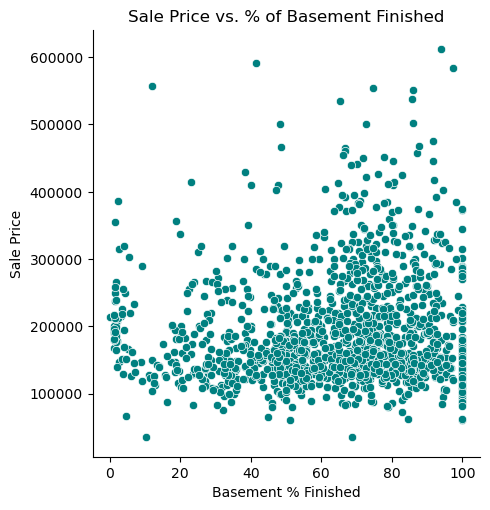

In [126]:
sns.relplot(data=train,
            x=train[train['bsmt_pct_fin'] > 0]['bsmt_pct_fin'],
            y='saleprice',
            color='teal',
            kind='scatter').set(title='Sale Price vs. % of Basement Finished',
                                xlabel='Basement % Finished',
                                ylabel='Sale Price');

In [127]:
train[['bsmt_pct_fin', 'saleprice']].corr()

,bsmt_pct_fin,saleprice
bsmt_pct_fin,1.000000,0.174286
saleprice,0.174286,1.000000


There doesn't appear to be a meaningful correlation here that is obvious to me.  This relationship will continue to be looked at this in modeling.

From some of the information we collected above, we know that ~97% of houses in this data have basements.  I'd like to see of those houses, what the finished percentage of the basements are, since that could speak to potential remodeling opportunities for the marketing campaign.

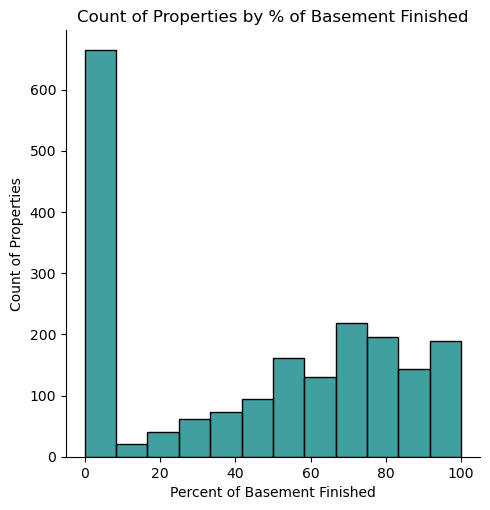

In [128]:
sns.displot(data=train[train['bsmt_qual'] != 'no value'],
            x='bsmt_pct_fin',
            kind='hist',
            color='teal'
           ).set(title='Count of Properties by % of Basement Finished', 
                 xlabel='Percent of Basement Finished',
                 ylabel='Count of Properties');

The majority of the houses have very small percentages of the basements finished.  This seems like a good potential opportunity to include information about basement improvements or remodeling that could be used for a marketing campaign to drive construction business.

In [129]:
train.bsmt_cond.value_counts(normalize=True)

TA          0.894917
Gd          0.043500
Fa          0.031769
no value    0.025904
Po          0.002444
Ex          0.001466
Name: bsmt_cond, dtype: float64

Bsmt Cond (Ordinal): Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
       
Only 2.6% of the properties report having no basement.  Most basements in this data (89.5%) are of typical quality.

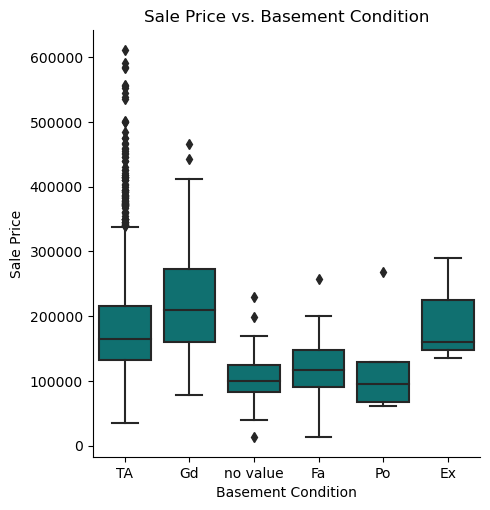

In [130]:
sns.catplot(data=train,
            x='bsmt_cond',
            y='saleprice',
            kind='box', 
            color='teal').set(title='Sale Price vs. Basement Condition',
                              xlabel='Basement Condition', 
                              ylabel='Sale Price');

Typical, good, and excellent basement condition appear to have higher sale prices.

In [131]:
train.bsmt_qual.value_counts(normalize=True)

TA          0.433529
Gd          0.421799
Ex          0.088954
Fa          0.029326
no value    0.025904
Po          0.000489
Name: bsmt_qual, dtype: float64

Bsmt Qual (Ordinal): Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

Over 50% of the basements in this data have heights of 90 inches or more, which may be an important factor when making these spaces valuable if remodeling were to occur.

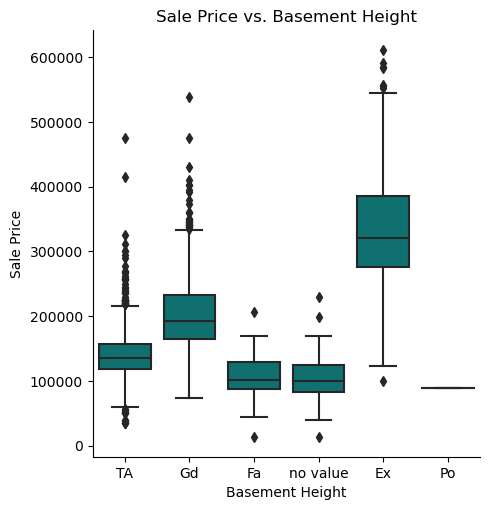

In [132]:
sns.catplot(data=train,
            x='bsmt_qual',
            y='saleprice',
            kind='box', 
            color='teal').set(title='Sale Price vs. Basement Height', 
                              xlabel='Basement Height', 
                              ylabel='Sale Price');

When looking at the height of the basement and sale price, it even though there is a some significant spread, basements rate Excellent have a much higher sale price.

#### Other quality and condition features

We'll examine the relationship between the following features and sale price:
- External Quality
- External Condition
- Kitchen Quality
- Garage Quality
- Garage Condition

In [133]:
train['exter_qual'].value_counts(normalize=True)

TA    0.608016
Gd    0.340665
Ex    0.038612
Fa    0.012708
Name: exter_qual, dtype: float64

~ 62% of houses have an exterior quality rating of Typical/Average and Below 

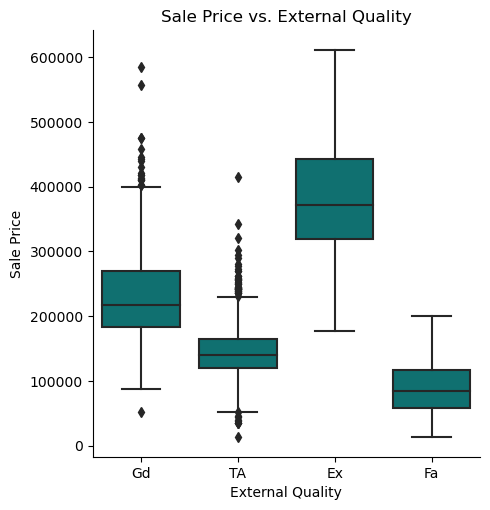

In [134]:
sns.catplot(data=train,
            x='exter_qual', 
            y='saleprice', 
            kind='box',
            color='teal').set(title='Sale Price vs. External Quality', 
                                xlabel='External Quality', 
                                ylabel='Sale Price');

In this plot we see that Excellent and Good ratings on external quality generally have higher sale prices, but there is a large range of house values for those categories as well.

In [135]:
train['exter_cond'].value_counts(normalize=True)

TA    0.866569
Gd    0.105083
Fa    0.023949
Ex    0.003421
Po    0.000978
Name: exter_cond, dtype: float64

~ 89% of houses have an exterior condition of Typical/Average or below

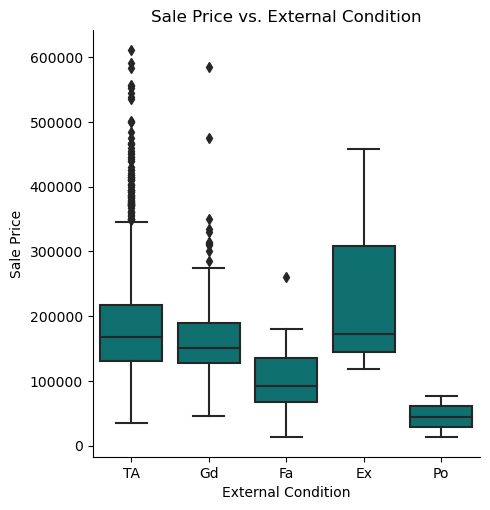

In [136]:
sns.catplot(data=train,
            x='exter_cond', 
            y='saleprice', 
            kind='box',
            color='teal').set(title='Sale Price vs. External Condition', 
                                xlabel='External Condition', 
                                ylabel='Sale Price');

Similar to overall condition, there doesn't seem to be as strong of a relationship between external condition and sales price as external quality and sales price.

In [137]:
train['kitchen_qual'].value_counts(normalize=True)

TA    0.511241
Gd    0.393451
Ex    0.072336
Fa    0.022972
Name: kitchen_qual, dtype: float64

~ 53% of houses have kitchens with a quality rating of Typical/Average or below

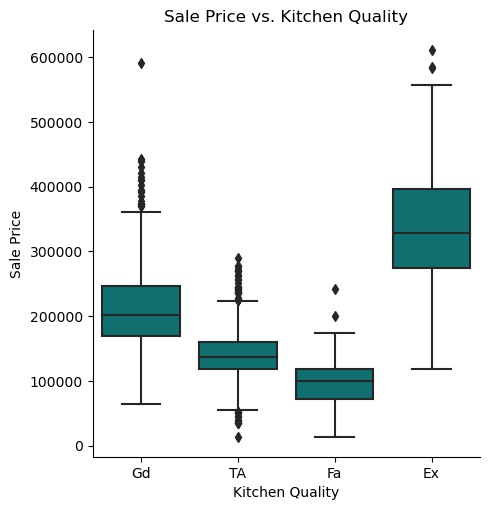

In [138]:
sns.catplot(data=train,
            x='kitchen_qual', 
            y='saleprice', 
            kind='box',
            color='teal').set(title='Sale Price vs. Kitchen Quality', 
                                xlabel='Kitchen Quality', 
                                ylabel='Sale Price');

There is only kitchen quality as a feature--no kitchen condition and there is no further description of what this might indicate.  We do see that Excellent and Good quality Kitchens drie the median sales price higher.  The Excellent kitchen median is over $300k, which is on the high end of the sale prices in this data.

In [139]:
train[train['garage_qual'] != 'no value'
     ]['garage_qual'].value_counts(normalize=True)

TA    0.945680
Fa    0.042421
Gd    0.009312
Ex    0.001552
Po    0.001035
Name: garage_qual, dtype: float64

~ 98% of houses with garages have a garage quality rating of Typical/Average or below

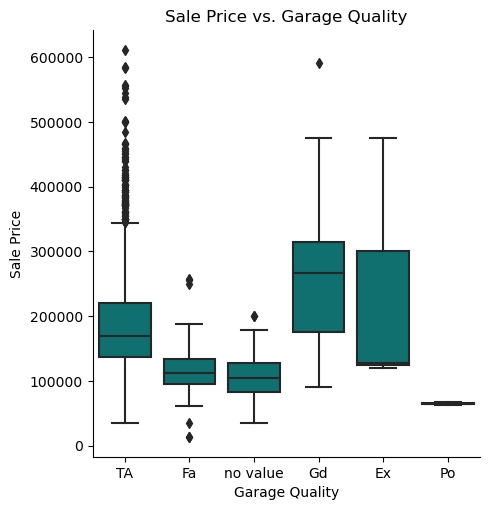

In [140]:
sns.catplot(data=train,
            x='garage_qual', 
            y='saleprice', 
            kind='box',
            color='teal').set(title='Sale Price vs. Garage Quality', 
                                xlabel='Garage Quality', 
                                ylabel='Sale Price');

This plot shows garage quality and sales price.  It's intriguing that the Excellent and Good categories are similar and the median of Excellent is actually lower than good and typical.  It looks like the highest concentration of ratings is typical, but let us check the histogram.

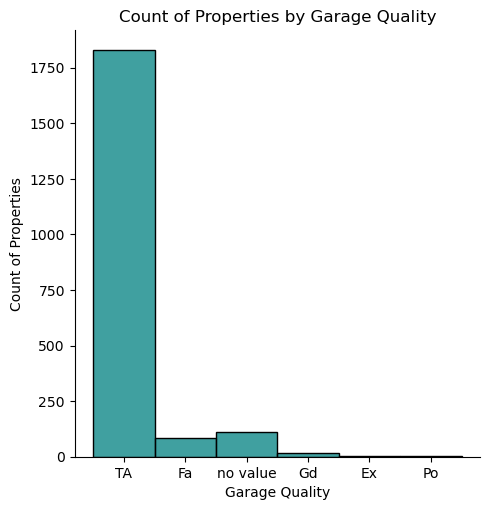

In [141]:
sns.displot(data=train,
            x='garage_qual',
            kind='hist',
            color='teal'
           ).set(title='Count of Properties by Garage Quality', 
                 xlabel='Garage Quality',
                 ylabel='Count of Properties');

This plot is showing the count of each garage quality rating and as we suspected, typical has the majority of the ratings which helps explain the odd price relationships we were seeing in the previous boxplot.

In [142]:
train[train['garage_cond'] != 'no value'
     ]['garage_cond'].value_counts(normalize=True)

TA    0.964304
Fa    0.024315
Gd    0.006208
Po    0.004139
Ex    0.001035
Name: garage_cond, dtype: float64

~ 99% of houses with garages have a garage quality rating of Typical/Average or below

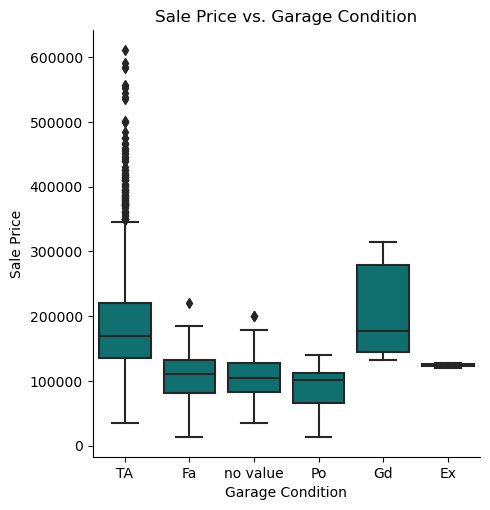

In [143]:
sns.catplot(data=train,
            x='garage_cond', 
            y='saleprice', 
            kind='box',
            color='teal').set(title='Sale Price vs. Garage Condition', 
                                xlabel='Garage Condition', 
                                ylabel='Sale Price');

This appears similar to the garage quality plot where we saw a high concentration in the typical field which created some discrepancies in pricing for the other categories--in this case excellent appears lower than typical, which seems counterintuitive.  

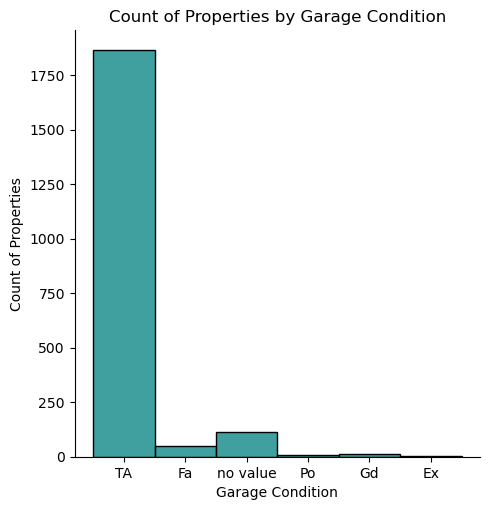

In [144]:
sns.displot(data=train,
            x='garage_cond',
            kind='hist',
            color='teal'
           ).set(title='Count of Properties by Garage Condition', 
                 xlabel='Garage Condition',
                 ylabel='Count of Properties');

Both the garage quality and the garage condition are overwhelmingly "typical".  Unfortunately, this isn't providing much insight as to how these features may be used for our analysis.

## Export Files
Exporting the CSV and then will move on to preprocessing, feature engineering and modeling. 

Check final shape

In [145]:
train.shape, test.shape

((2046, 60), (878, 59))

Ensure that the features between the train and test data are the same, except for the target `saleprice`

In [146]:
set(train.columns)-set(test.columns)

{'saleprice'}

Final null check before export

In [147]:
train.isnull().sum()[train.isnull().sum() > 0],\
test.isnull().sum()[test.isnull().sum() > 0]

(Series([], dtype: int64), Series([], dtype: int64))

In [148]:
train.to_csv('../data/train_cleaned.csv', index=False, na_rep='no value')
test.to_csv('../data/test_cleaned.csv', index=False, na_rep='no value')

## Observations and Insights From Cleaning and EDA

### House and Lot Summary Information
Looking across the 2000+ records that were provided for analysis, below is some basic summary information.

Mean basic property information:
- 2548 sq ft
- 2.8 bedrooms
- 2.2 bathrooms
- $181,494 sale price

A 'typical' lot in this data appears to be:
- 68 Linear Feet of street connected to the property
- Lot area of ~10,000 square feet
- Accessed by paved roads
- Regular or slightly irregular lot shape
- Level ground
- Inside lot
- All public utilities available


## Market Opportunity
Much of the focus, given the data set will be around Quality and Condition, but there may be a couple of other insights regarding market opportunity from this data. For the quality and condition information we are focusing on Typical/Average and lower as that is what we are considering opportunities based on this information alone.

### House Age
One of the factors that might drive some remodeling efforts would be the age of the house:
- Although it appears there was a major home construction increase starting in 2000, almost **73% of the houses were built before 2000**.

### General Quality and Condition Information

There appears to be a stronger relationship of overall quality of the material and finish of the house increasing the sale price.  This appears from our basic charts in most areas that have this information (Overall, Exterior, Basement, Garage, Kitchen).  The amount of impact should be looked at during modeling.

#### Overall Quality and Condition
Scale: 1 - 10 (very poor to very excellent) 5: Average
- 63% of the houses are characterized as having an overall condition of average or below
- 37% of the houses having materials and finish that rate average or below

#### Exterior, Kitchen, Garage
Scale: Excellent - Good - Average/Typical - Fair - Poor
       
- Exterior
    - 62% of houses have an exterior quality rating of Typical/Average and Below 
    - 89% of houses have an exterior condition of Typical/Average or below
- Kitchen
    - 53% of houses have kitchens with a quality rating of Typical/Average or below
- Garage
    - 98% of houses with garages have a garage quality rating of Typical/Average or below
    - 99% of houses with garages have a garage quality rating of Typical/Average or below

#### Basement Breakdown
- 97% of the houses in the data have a basement
- 96% of the houses that have a basement, basement condition is reported as Typical/Average or lower
- The average of basement in Ames is 45% finished, however when you look more closely, the majority of houses have a very small percentage of their basement finished
- Quality for basement is actually a measurement of height, which may also be helpful in thinking about remodeling opportunities.
- Over 50% of the basements in this data have heights of 90 inches or more
    - These properties had a median selling price over \$300k
- An additional 43% have heights in the 80-89 inch range

## Notes For Modeling
Most correlated features with sale price appear to be:
- overall quality
- overall condition (not as strong)
- gr_liv_area
- 1st_flr_sf
- total_bsmt_sf
- full_bath
- totrms_abvgrd
- fireplaces
- garage_cars

Some of these features, such as Living Area, 1st floor square feet, and total basement square feet would also be represented by the tot_sf we calculated and added as a feature.